This script is to add data general. 
Import all required tools

In [1]:
import ixmp
import message_ix
import numpy as np
import pandas as pd
import yaml

import warnings
warnings.filterwarnings('ignore')

from collections.abc import Mapping
from itertools import repeat
from message_ix.models import MESSAGE_ITEMS
from message_ix.utils import make_df

from message_ix.tools.add_dac import add_dac
from message_ix.tools.add_dac import get_report


%matplotlib inline

mp = ixmp.Platform() # 'local'
# mp.scenario_list()

<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


This part is just to generate a dummy scenario as basis for adding technology parameters. Need to be removed once integrated

In [2]:
base = message_ix.Scenario(
    mp, model="GENIE_sandbox_daccstest", scenario="baseline",
)
# data_file = 'GENIE_sandbox_daccstest.xlsx'
# base.read_excel(data_file, add_units=True, init_items=True)

In [3]:

scen = base.clone(
    "GENIE_sandbox_daccstest",
    "nodaccs_baseline",
    "introducing the add_tech feature on MESSAGEix", 
    keep_solution=False, 
)
scen.check_out()

year_df = scen.vintage_and_active_years()
vintage_years, act_years = year_df["year_vtg"], year_df["year_act"]
model_horizon = scen.set("year")

## Run the model

In [4]:
scen.commit(comment="Copy and run baseline scenario")
scen.set_as_default()
scen.solve(solve_options={'barcrossalg': '2','scaind':'1'})
scen.var("OBJ")["lvl"]

3104155.5

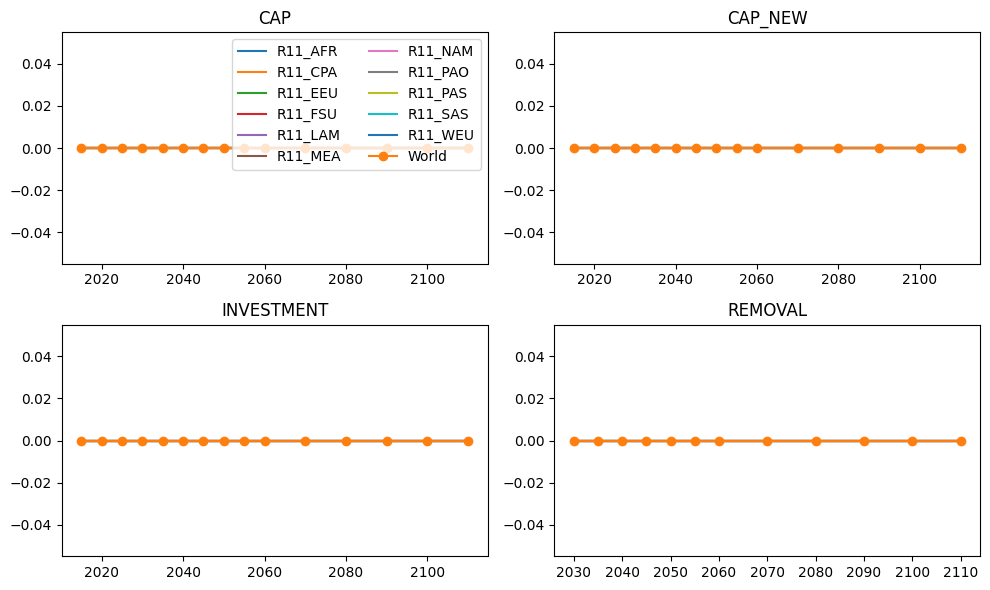

In [5]:
# Create list of technologies for get_report()
scenariotec = ['bio_istig_ccs','eth_bio_ccs','h2_bio_ccs','liq_bio_ccs']

# This is how you get the plot of the results
scenario_report = get_report(scen,scenariotec)

## Close connection

In [6]:
mp.close_db()